# Setup

In [1]:
import os, sys, json, numpy as np, pandas as pd
import seaborn as sns, matplotlib.pyplot as plt, matplotlib.patches as mpatches

In [2]:
from sklearn.decomposition import PCA
import phate

In [4]:
from config.constants import UNZIPPED_INPUT_FILE
from src.dataset import KreuzerSkarkeDataset
from utils.plots import tripple_scatter

# Load Data

In [14]:
dataset = KreuzerSkarkeDataset(input_file=UNZIPPED_INPUT_FILE, save_projections=True,  projections_file='test', num_samples=10)
X_proj, Y = dataset.X_proj, dataset.Y

Saving projection to /Users/solst/Projects/kreuzer-skarke-ML/data/projections/test


# Dimensional Reduction

In [15]:
n_comps = 10
c_names = [f'd{i}' for i in range(1, n_comps + 1)]
X_flat = X_proj.reshape(-1, np.multiply(*list(X_proj.shape)[1:]))

In [16]:
phate_op = phate.PHATE(n_components=n_comps, n_jobs=-1)
Y_phate = phate_op.fit_transform(X_flat)

Calculating PHATE...
  Running PHATE on 1000 observations and 104 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.10 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.03 seconds.
    Calculating affinities...
  Calculated graph and diffusion operator in 0.14 seconds.
  Calculating optimal t...
    Automatically selected t = 19
  Calculated optimal t in 1.08 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.11 seconds.
  Calculating metric MDS...


/Users/solst/mambaforge/envs/kreuzer-skarke/lib/python3.10/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


  Calculated metric MDS in 20.18 seconds.
Calculated PHATE in 21.52 seconds.


In [17]:
pca_op = PCA(n_components=n_comps)
Y_pca = pca_op.fit_transform(X_flat)

In [18]:
df_phate = pd.DataFrame(Y_phate, columns=c_names).join(pd.DataFrame(Y, columns=['Hodge']))
df_pca  = pd.DataFrame(Y_pca, columns=c_names).join(pd.DataFrame(Y, columns=['Hodge']))

/Users/solst/Projects/kreuzer-skarke-ML/utils/plots.py:17: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(df.d1, df.d2, s=120, c='black', cmap=cmap)
/Users/solst/Projects/kreuzer-skarke-ML/utils/plots.py:18: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(df.d1, df.d2, s=100, c='white', cmap=cmap)


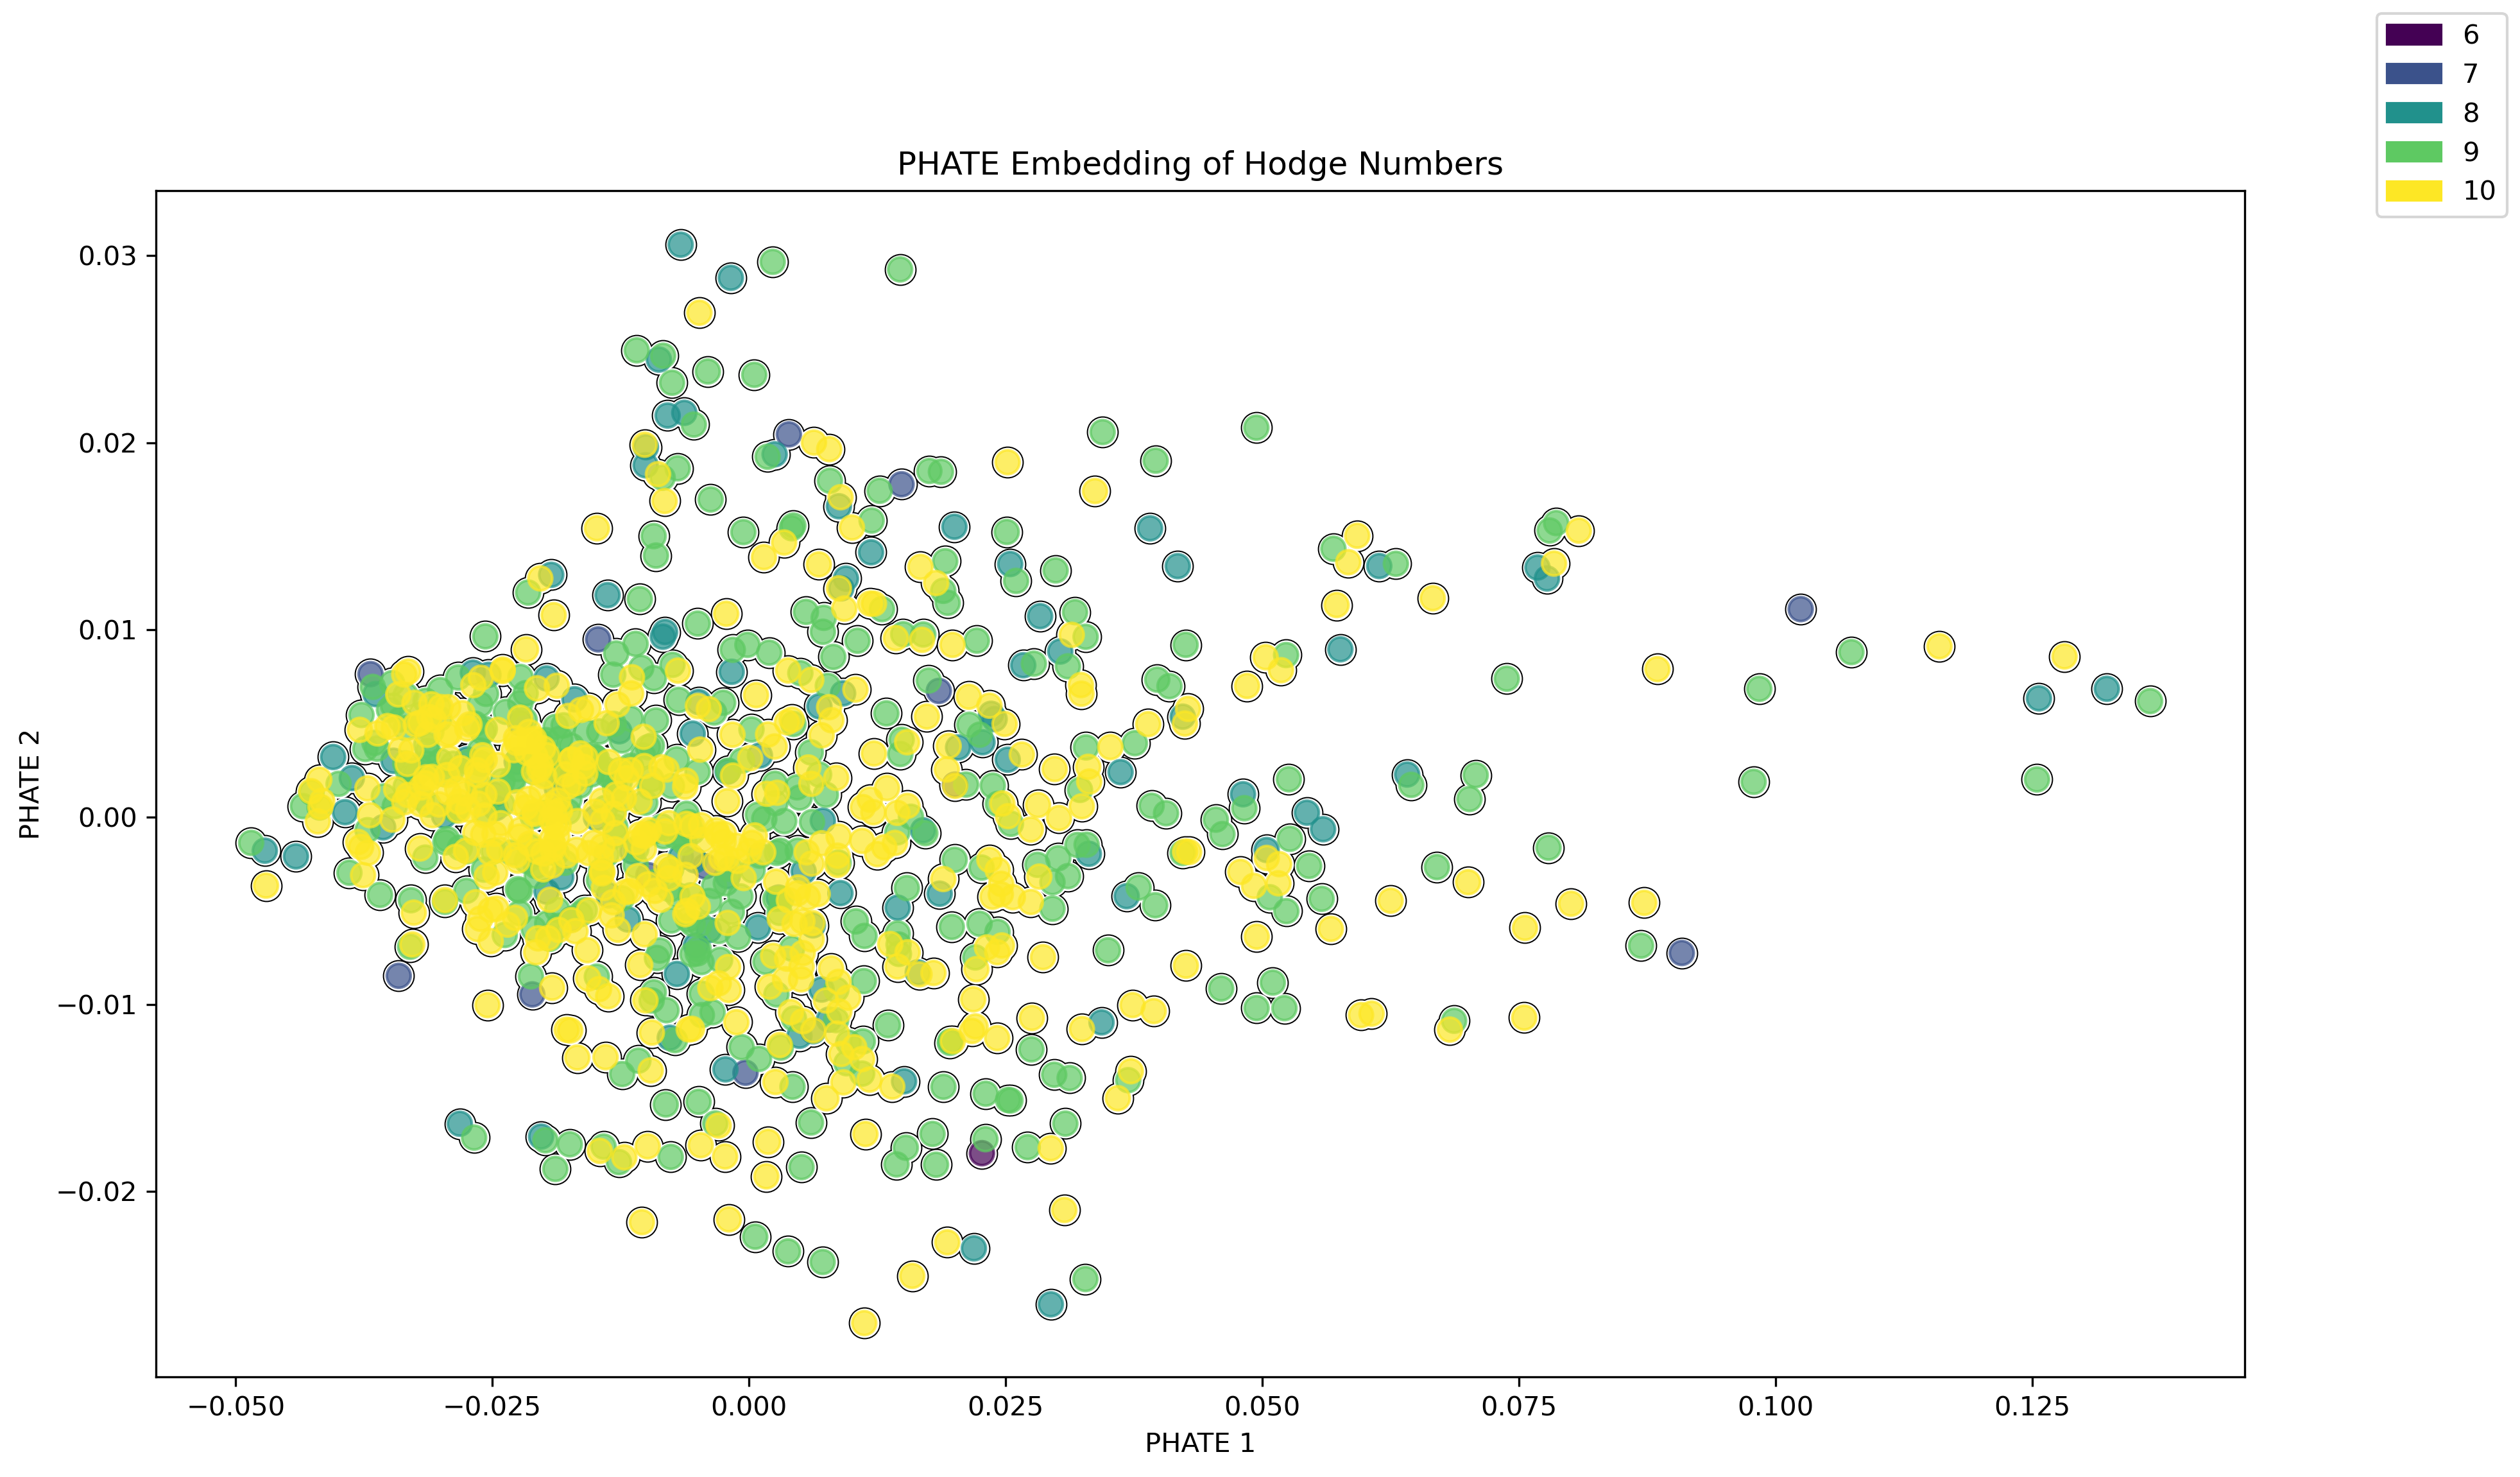

In [19]:
fig, ax = tripple_scatter(df_phate, emb_name='PHATE')

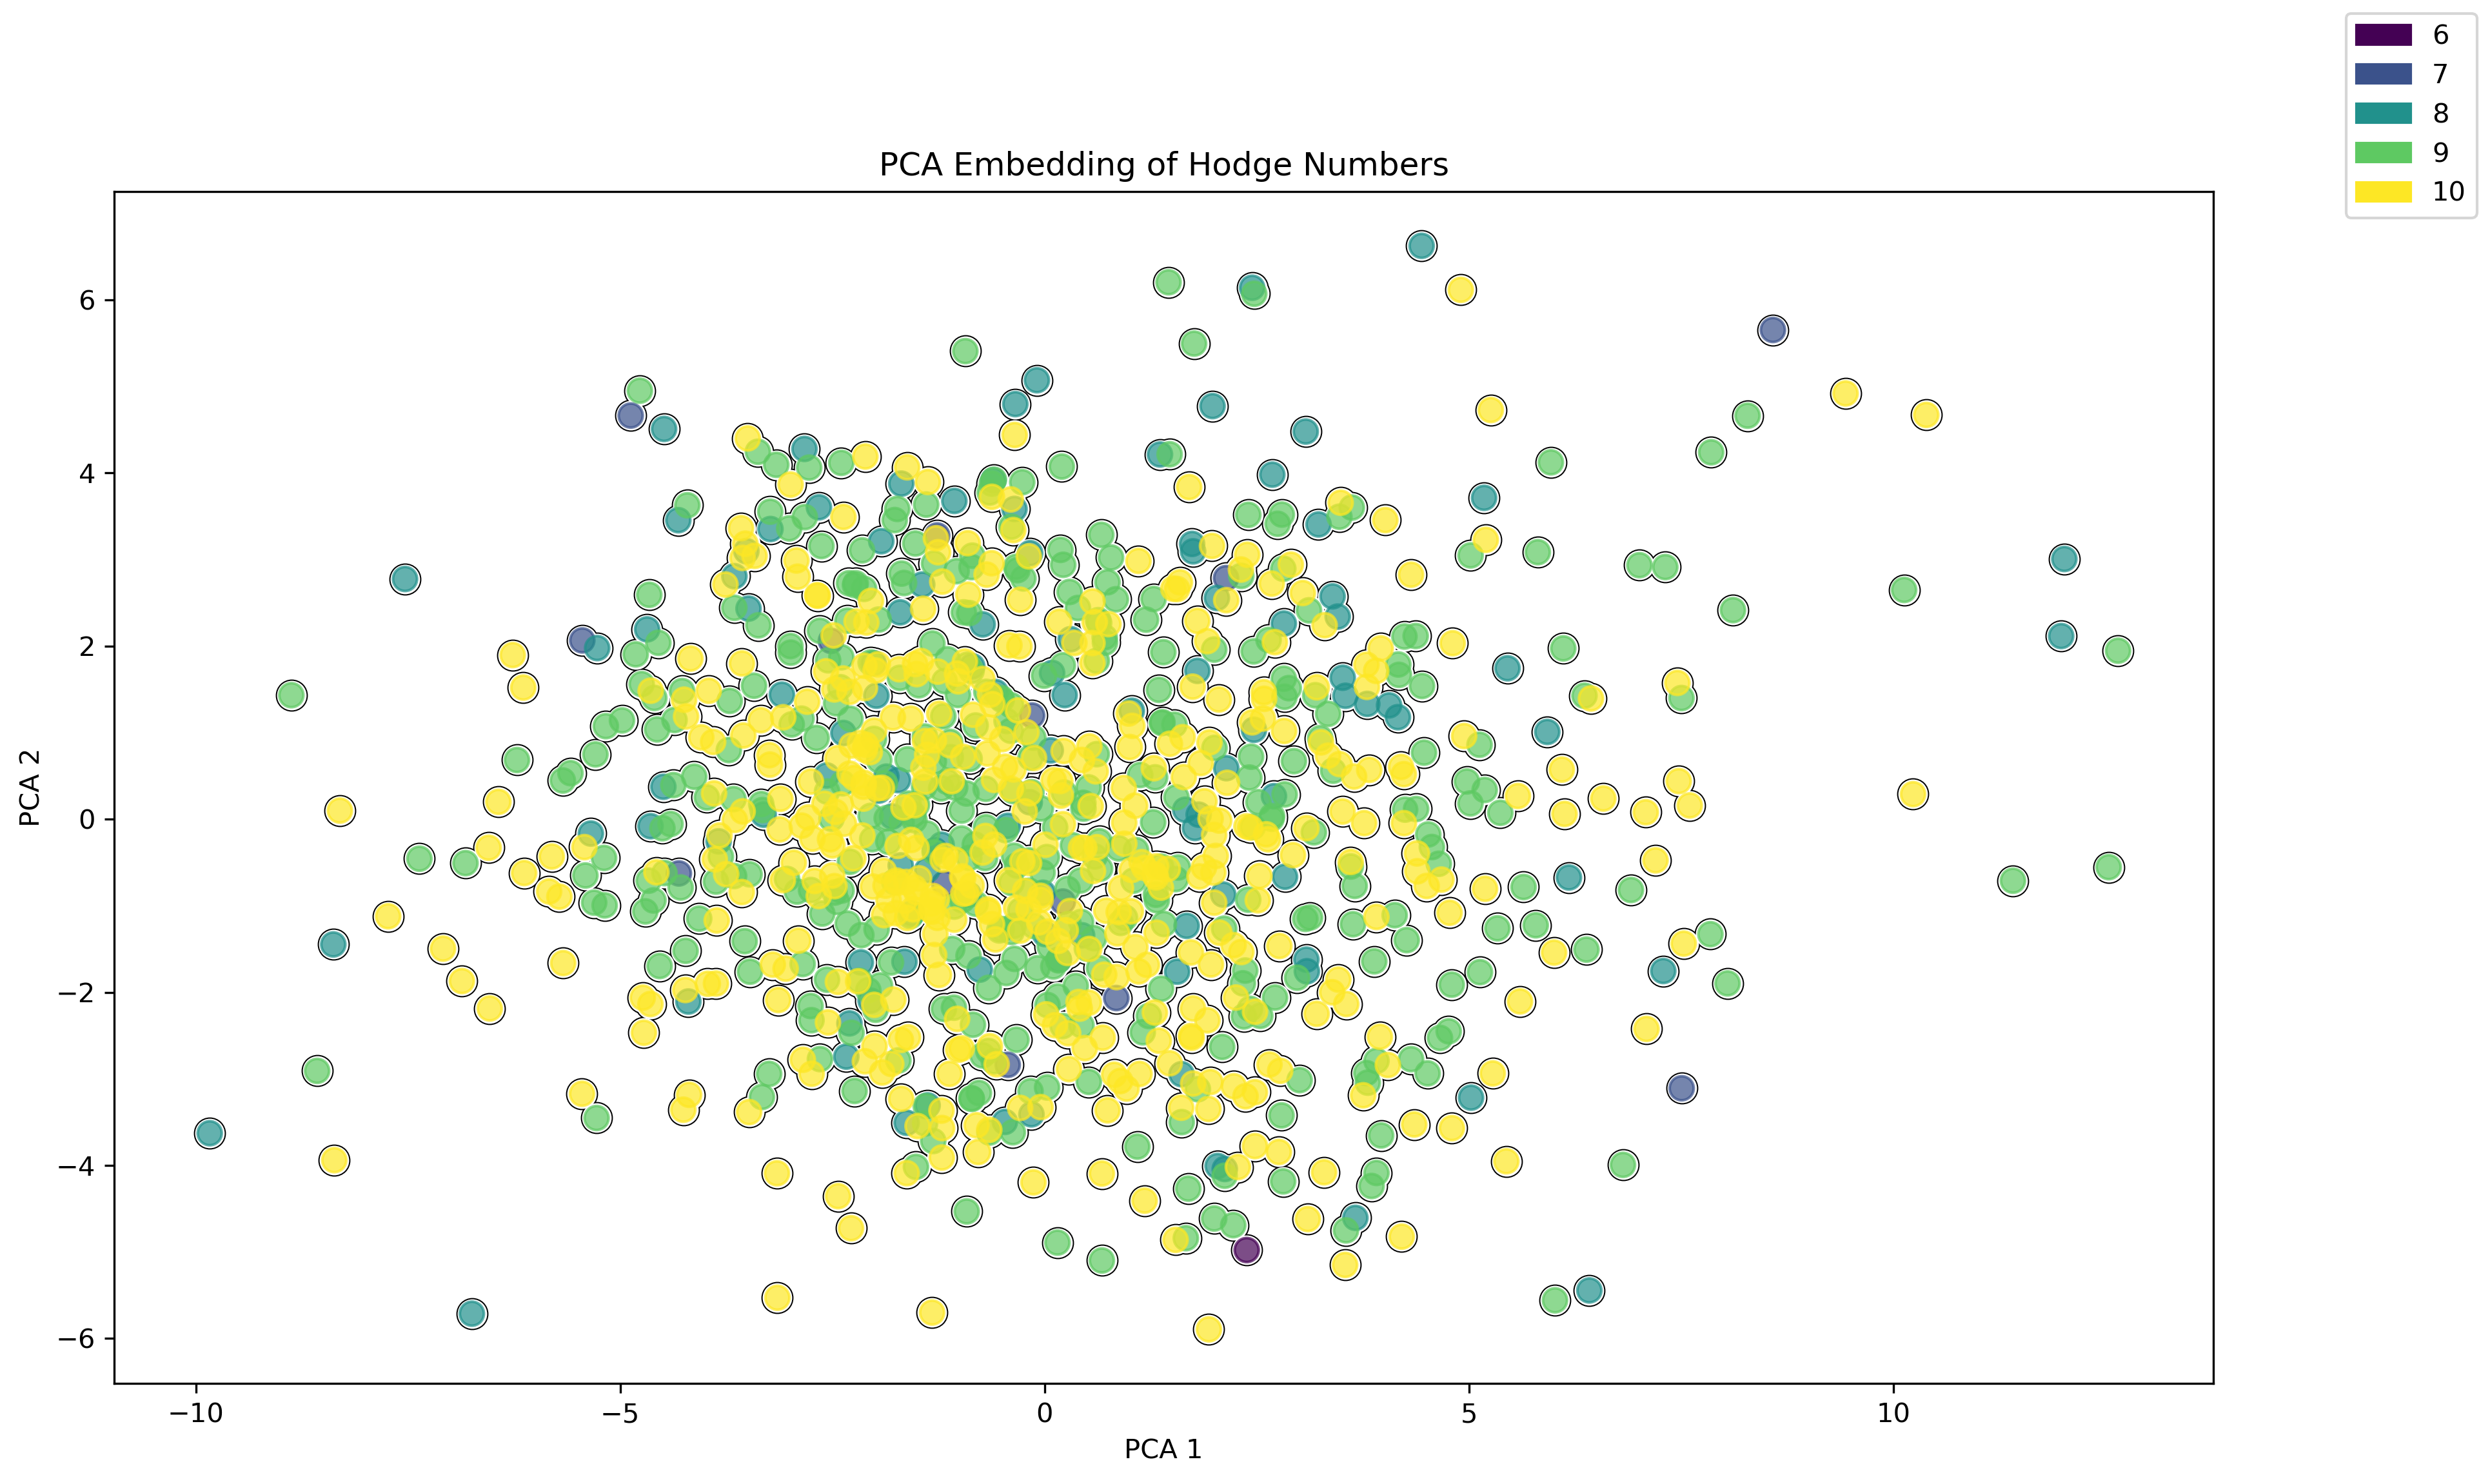

In [20]:
fig, ax = tripple_scatter(df_pca, emb_name='PCA')